## 3.1 常数包和特殊函数包

In [2]:
from scipy import constants as C

In [9]:
C.c     #光速

299792458.0

In [12]:
C.h     #普朗克常数

6.62607015e-34

In [6]:
C.g

9.80665

In [7]:
C.G

6.6743e-11

In [11]:
C.pi

3.141592653589793

In [18]:
C.physical_constants['Boltzmann constant']    #玻尔兹曼常数

(1.380649e-23, 'J K^-1', 0.0)

In [19]:
#特殊函数

In [23]:
import math    #python的数学函数
math.log(1)

0.0

In [29]:
math.log(1+1e-20)    

0.0

In [26]:
from scipy import special    #特殊函数包

In [31]:
special.log1p(1e-20)     #泰勒展开（数值计算）

1e-20

In [32]:
special.cbrt(27)         #开三次方

3.0

In [34]:
special.round(3.1)       #四舍五入函数

3.0

In [35]:
special.round(3.6)

4.0

In [37]:
int(3.1)      #python的取整

3

In [38]:
import numpy as np

In [44]:
np.round(4.49,1)   #numpy的取整(并且支持小数点后几位)

4.5

In [47]:
special.perm(5,3)    #排列 5*4*3

60.0

In [48]:
special.comb(5,3)    #5*4*3/(3*2*1)

10.0

## 3.2 优化（最小二乘法）

### 最小二乘法（leastsq函数）

In [49]:
import numpy as np
from scipy.optimize import leastsq   #从优化包里面引入处理最小二乘法的函数

In [62]:
x  =np.linspace(-1,1,10)
x

array([-1.        , -0.77777778, -0.55555556, -0.33333333, -0.11111111,
        0.11111111,  0.33333333,  0.55555556,  0.77777778,  1.        ])

In [78]:
y = x + np.random.random(10)
y

array([-0.16711379, -0.65095245,  0.05589721,  0.13892511,  0.36253531,
        0.31828726,  0.69555521,  0.64786326,  1.01440808,  1.24391162])

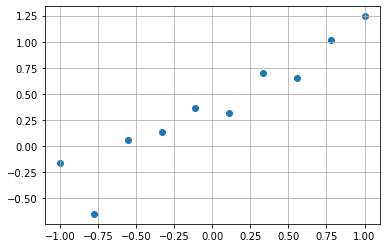

In [110]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.grid()
plt.show()

In [111]:
# y = kx + b
#输入参数，返回真实值和预测值的差值
def residuals(p):
    k,b = p        #(k,b)对
    return y -(k*x + b)    #真实值和预测值的差

r = leastsq(residuals,[1,0])   #参数：自定义函数 初始参数（k，b）
k,b = r[0]
print(r)
print(k,b)

(array([0.78933341, 0.36593168]), 2)
0.7893334095469825 0.3659316839378351


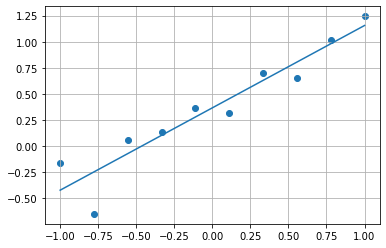

In [112]:
y_1 = k*x + b
plt.scatter(x,y)
plt.grid()
plt.plot(x,y_1)
plt.show()

### 函数最小值（fmin函数）

In [151]:
import numpy as np
import scipy.optimize as opt

In [161]:
#Rosenbrock函数
def f(p):
    x,y = p     #赋值方法
    z = (1-x)**2 + 100*(y-x**2)**2
    return z

#梯度函数
def fprime(p):
    x,y = p
    dx = -2 + 2*x - 400*x*(y - x**2)
    dy = 200*y - 200*x**2
    return np.array([dx,dy])

In [162]:
result = opt.fmin(f,[2,2]) #梯度法
result

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 62
         Function evaluations: 119


array([0.99998292, 0.99996512])

In [163]:
m= result[0]
m

0.9999829164576213

In [164]:
#例子
def fun(p):
    x,y = p
    z = x**2 + y**3
    return z

res = opt.fmin(fun,[1,0])
res

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 53


array([3.25046480e-05, 9.45305816e-04])

In [165]:
#共轭梯度下降法:优化函数可微，可导（计算速度最快）
res = opt.fmin_cg(f,[2,2],fprime)
res

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 43
         Gradient evaluations: 43


array([1.00000772, 1.00001548])

In [166]:
opt.fmin_bfgs(f,[2,2],fprime)#共轭牛顿法

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 30
         Function evaluations: 35
         Gradient evaluations: 35


array([1.00000013, 1.00000025])

### 非线性方程组求解（fsolve函数）

In [174]:
from scipy.optimize import fsolve
from math import sin

In [175]:
def f(x):
    x0,x1,x2 = x.tolist()
    return [
        5*x1+3,
        4*x0**2-2*sin(x1*x2),
        x1*x2-1.5        
    ]

In [176]:
res = fsolve(f,[1,1,1])
res

array([-0.70622057, -0.6       , -2.5       ])

In [179]:
f(res)

[0.0, -9.126033262418787e-14, 5.329070518200751e-15]

In [183]:
z = np.random.randint(0,10,size=(4,4))
z.tolist()

[[8, 8, 1, 4], [6, 3, 9, 5], [2, 6, 4, 9], [5, 1, 2, 8]]

## 3.3 插值计算

In [154]:
import numpy as np
from scipy import interpolate        #插值模块
import matplotlib.pyplot as plt

In [148]:
## 拟合  插值：都是想得到某种模型的特性曲线
"""
拟合：不要求直线通过所有的点，样本数量比较大的时候
插值：要求必须过所有的点，适合数量比较少的情形，同时我们暂时不知用什么曲线去拟合
"""

'\n拟合：不要求直线通过所有的点，样本数量比较大的时候\n插值：要求必须过所有的点，适合数量比较少的情形，同时我们暂时不知用什么曲线去拟合\n'

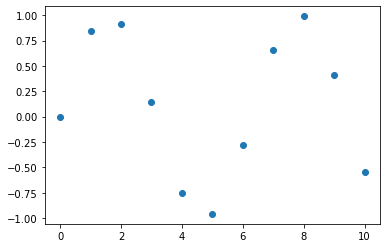

In [156]:
x = np.linspace(0,10,11)
y = np.sin(x)

plt.scatter(x,y)
plt.show()

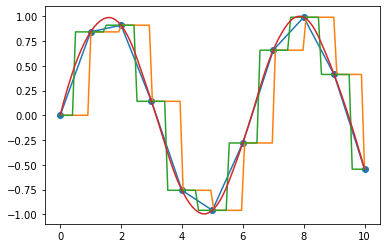

In [171]:
#插值
xnew = np.linspace(0,10,100)
for kind in ['slinear','zero','nearest','quadratic']:
    f = interpolate.interp1d(x,y,kind=kind)    #一维插值（线性插值）
    ynew = f(xnew)
    plt.plot(xnew,ynew)
plt.scatter(x,y)
plt.show()

## 3.4.1 线性代数

In [2]:
from scipy import linalg
import numpy as np

In [190]:
#方程组求解
#A*x=b
A = np.array([[1,3,5],[2,5,1],[2,3,8]])
b = np.array([10,8,3])
x = linalg.solve(A,b)
x

array([-9.28,  5.16,  0.76])

In [191]:
A.dot(x)

array([10.,  8.,  3.])

In [192]:
#行列式
linalg.det(A)

-25.000000000000004

In [195]:
l,v = linalg.eig(A)
print(l,v)

[10.5540456 +0.j -0.5873064 +0.j  4.03326081+0.j] [[-0.51686204 -0.94195144  0.11527992]
 [-0.32845853  0.31778071 -0.81936883]
 [-0.79054957  0.10836468  0.56155611]]


In [196]:
#SVD分解

In [26]:
X  = np.array([[0,0,0,2,2],
               [0,0,0,3,3],
               [0,0,0,1,1],
               [1,1,1,0,0],
               [2,2,2,0,0],
               [5,5,5,0,0],
               [1,1,1,0,0]])
U,S,V = linalg.svd(X)
print(U)
print(S)
print(V)

[[-2.22044605e-16  5.34522484e-01  8.41650989e-01  5.59998398e-02
  -5.26625636e-02  2.77555756e-17  1.38777878e-17]
 [ 0.00000000e+00  8.01783726e-01 -4.76944344e-01 -2.09235996e-01
   2.93065263e-01 -4.01696905e-17 -2.77555756e-17]
 [ 0.00000000e+00  2.67261242e-01 -2.52468946e-01  5.15708308e-01
  -7.73870662e-01  1.54770403e-16  0.00000000e+00]
 [-1.79605302e-01  0.00000000e+00  7.39748546e-03 -3.03901436e-01
  -2.04933639e-01  8.94308074e-01 -1.83156768e-01]
 [-3.59210604e-01  0.00000000e+00  1.47949709e-02 -6.07802873e-01
  -4.09867278e-01 -4.47451355e-01 -3.64856984e-01]
 [-8.98026510e-01  0.00000000e+00 -8.87698255e-03  3.64681724e-01
   2.45920367e-01 -1.07974660e-16 -1.12074131e-17]
 [-1.79605302e-01  0.00000000e+00  7.39748546e-03 -3.03901436e-01
  -2.04933639e-01  5.94635264e-04  9.12870736e-01]]
[9.64365076e+00 5.29150262e+00 7.40623935e-16 4.05103551e-16
 2.21838243e-32]
[[-5.77350269e-01 -5.77350269e-01 -5.77350269e-01  0.00000000e+00
   0.00000000e+00]
 [-2.46566547e-16

In [5]:
U.shape

(7, 7)

In [6]:
np.round(U.dot(U.T))

array([[ 1., -0., -0., -0., -0.,  0.,  0.],
       [-0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [-0.,  0.,  1.,  0., -0.,  0., -0.],
       [-0.,  0.,  0.,  1.,  0., -0.,  0.],
       [-0.,  0., -0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0., -0.,  0.,  1.,  0.],
       [ 0.,  0., -0.,  0.,  0.,  0.,  1.]])

In [11]:
np.round(U.dot(U.T)).astype(np.int8)   #先取整，然后转换类型

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1]], dtype=int8)

In [20]:
np.round(V.dot(V.T)).astype(np.int8)

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]], dtype=int8)

In [41]:
x = np.dot(np.diag(S),V)

In [25]:
np.round(np.dot(U[:,0:5],np.dot(np.diag(S),V))).astype(np.int8)

array([[0, 0, 0, 2, 2],
       [0, 0, 0, 3, 3],
       [0, 0, 0, 1, 1],
       [1, 1, 1, 0, 0],
       [2, 2, 2, 0, 0],
       [5, 5, 5, 0, 0],
       [1, 1, 1, 0, 0]], dtype=int8)

In [ ]:
#SVD分解：图像压缩，噪声消除

In [37]:
X  = np.array([[0.01,0,0,2,2],
               [0,0,0.01,3,3],
               [0,0.01,0,1,1],
               [1,1,1,0,0.01],
               [2,2,2,0,0],
               [5,5,5,0,0],
               [1,1,1,0,0]])

In [43]:
U,S,V = linalg.svd(X)
print(S)

[9.64365902e+00 5.29150325e+00 1.00000000e-02 9.25820020e-03
 6.95607726e-03]


In [57]:
#低秩近似
np.round(np.dot(U[:,0:2],np.dot(np.diag(S[:2]),V[:2,:])),2) #取整消除了噪声

array([[ 0.  ,  0.  ,  0.  ,  2.  ,  2.  ],
       [ 0.  ,  0.  ,  0.01,  3.  ,  3.  ],
       [ 0.  ,  0.  ,  0.  ,  1.  ,  1.  ],
       [ 1.  ,  1.  ,  1.  ,  0.  ,  0.01],
       [ 2.  ,  2.  ,  2.  , -0.  ,  0.  ],
       [ 5.  ,  5.  ,  5.  , -0.  ,  0.  ],
       [ 1.  ,  1.  ,  1.  , -0.  ,  0.  ]])

### 3.4.2 数值积分

In [61]:
#求一个半圆的面积（半径为1的单位圆）：pi*r**2=pi

In [66]:
np.pi/2

1.5707963267948966

In [64]:
from scipy import constants as C

In [65]:
C.pi/2

1.5707963267948966

In [80]:
def half_circle(x):
    return np.sqrt(1-x**2)

In [74]:
N = 1000
x = np.linspace(-1,1,N)
dx = x[1] - x[0]
y = half_circle(x)
np.sum(y*dx)      #小矩形面积求和

1.570743659523107

In [83]:
#一维积分
from scipy import integrate
from math import sqrt

In [76]:
integrate.quad(half_circle,-1,1)

(1.5707963267948983, 1.0002354500215915e-09)

In [85]:
def half_sphere(x,y):
    return (1-x**2-y**2)**0.5

In [86]:
integrate.dblquad(half_sphere,-1,1,lambda x:-half_circle(x),lambda x:half_circle(x))

(2.0943951023931984, 1.0002354500215915e-09)

In [110]:
from scipy.integrate import odeint   #对微分方程组进行积分
#洛伦兹吸引子:位置对时间的导数，混沌效应
def lorenz(w,t,p,r,b):
    x,y,z = w
    return p*(y-x),x*(r-z)-y,x*y-b*z

In [111]:
t = np.arange(0,30,0.01)
track1 = odeint(lorenz,(0.0,1.1,0.0),t,args=(10.0,28.0,3.0))
track2 = odeint(lorenz,(0.0,0.1,0.0),t,args=(10.0,28.0,3.0))

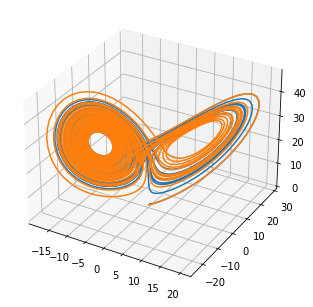

In [112]:
#三维图像
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(track1[:,0],track1[:,1],track1[:,2])
ax.plot(track2[:,0],track2[:,1],track2[:,2])
plt.show()

### 3.5 Scipy信号处理

In [120]:
##设计滤波器，从噪声中恢复原始信号

In [122]:
import numpy as np
import scipy.signal as signal     #信号处理的包
import matplotlib.pyplot as plt


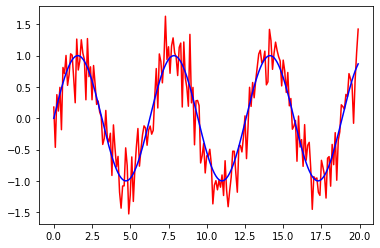

In [180]:
t = np.arange(0,20,0.1)
x = np.sin(t) 
noise = 0.3*np.random.normal(size=t.shape)
x_n = x + noise
plt.plot(t,x_n,color='red')
plt.plot(t,x,color='blue')
plt.show()

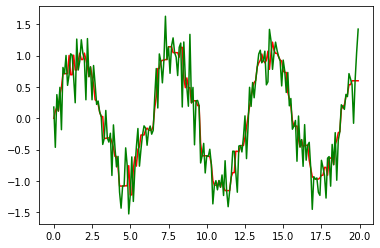

In [200]:
x_2 = signal.medfilt(x_n,5)    #中值滤波、低通滤波
plt.plot(t,x_2,color='red')
plt.plot(t,x_n,color='green')
#plt.plot(t,x,color='blue')
plt.show()

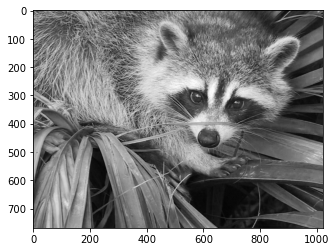

In [203]:
import scipy.misc
img = scipy.misc.face()
gray = img[:,:,0]
plt.gray()
plt.imshow(gray)
plt.show()

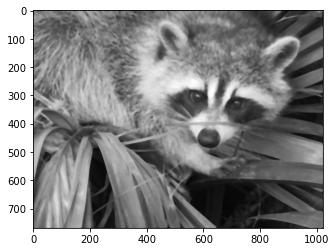

In [206]:
gray1 = signal.medfilt2d(gray,kernel_size=9)
plt.imshow(gray1)
plt.show()

### 3.5 Scipy信号处理